## Hi-C quality check

The file is organized in 4 lines per read:
 1. starting with `@`, the header of the DNA sequence with the read id (plus optional fields)
 2. the DNA sequence
 3. starting with `+`, the header of the sequence quality (this line could be either a repetition of first line or empty)
 4. the sequence quality (it is provided as PHRED score and it is not human readable. Check   https://en.wikipedia.org/wiki/Phred_quality_score for more details)

In [1]:
%%bash 

dsrc d -s FASTQs/mouse_B_rep1_1.fastq.dsrc | head -n 8

@SRR5344921.1
ACCACTGATGGCACCACTGTTGTACTTTAGGATCGATCACTCCTTATACGCACATAGGAAACACTGACTAGAGGG
+
@B@B@>1>=;1@EG0B0;1=E1:>>1111<?=1E9=0><C:<>11=11?1=ECDC1>1=@FD1<:1?C#######
@SRR5344921.2
GGGCTTTTTTTGGCTGGGAGACTATTTATAACTGCTTCTATTTCTTTAGGGGATATGGGACTGTTTAGAAGGTCA
+
BCCBBFGGGG@GEGGGGDGEBGEF@<1FGGEFGGECGG@FEGGGEG>@1=09/BFGGEG111C<F1>11BGF1=1


Count the number of lines in the file (4 times the number of reads)

In [2]:
%%bash

dsrc d -s FASTQs/mouse_B_rep1_1.fastq.dsrc | wc -l

400000000


There are 400 M lines in the file, which means 100M reads in total.

### Quality check before mapping

#### Check restriction-enzyme used

Most important to analyze Hi-C dataset is the restriction enzyme used in the experiment. TADbit provides a simple function to check for it:

In [3]:
from pytadbit.mapping.restriction_enzymes import identify_re

In [4]:
pat, enz, pv = identify_re('FASTQs/mouse_B_rep1_1.fastq.dsrc')

print('- Most probable pattern: %s, matching enzymes: %s' % (pat, ','.join(enz)))

- Most probable pattern: GATC, matching enzymes: BssMI,DpnII,Sau3AI,MboI,Kzo9I,Bsp143I,NdeII,BstMBI,BfuCI


#### Plot PHRED score and ligation/digestion sites

In order to quickly assess the quality of the HiC experiment (before mapping), and given that we know the restriction enzyme used, we can check the proportion of reads with ligation sites as well as the number of reads starting by a cut-site.

These numbers will give us a first hint on the __efficiencies of two critical steps in the HiC experiment, the digestion and the ligation.__

In [5]:
from pytadbit.utils.fastq_utils import quality_plot

In [6]:
r_enz = 'MboI'

In [7]:
cell = 'B'
repl = 'rep1'

The plot on the top represents the typical per nucleotide quality profile of NGS reads, with, in addition, the proportion of `N` found at each position. 

The second plot, is specific to Hi-C experiments. Given a restriction enzyme the function searches for the presence of ligation sites and of undigested restriction enzyme sites. Depending on the enzyme used the function can differentiate between dangling-ends and undigested sites.

From these proportions some quality statistics can be inferred before mapping:
- The __PHRED score__ and the __number of unidentified nucleotides__ (Ns) in the read sequence, which are routinely computed to address the quality of high-throughput sequencing experiments.
- The numbers of __undigested and unligated RE sites per-nucleotide__ along the read to assess the quality of the Hi-C experiment.
- The overall __percentage of digested sites__, which relates directly to the RE efficiency.
- The __percentage of non-ligated digested__ (dangling-ends), which relates to the ligation efficiency.
- The __percentage of read-ends with a ligation site__, which is negatively correlated with the percentage of dangling-ends.

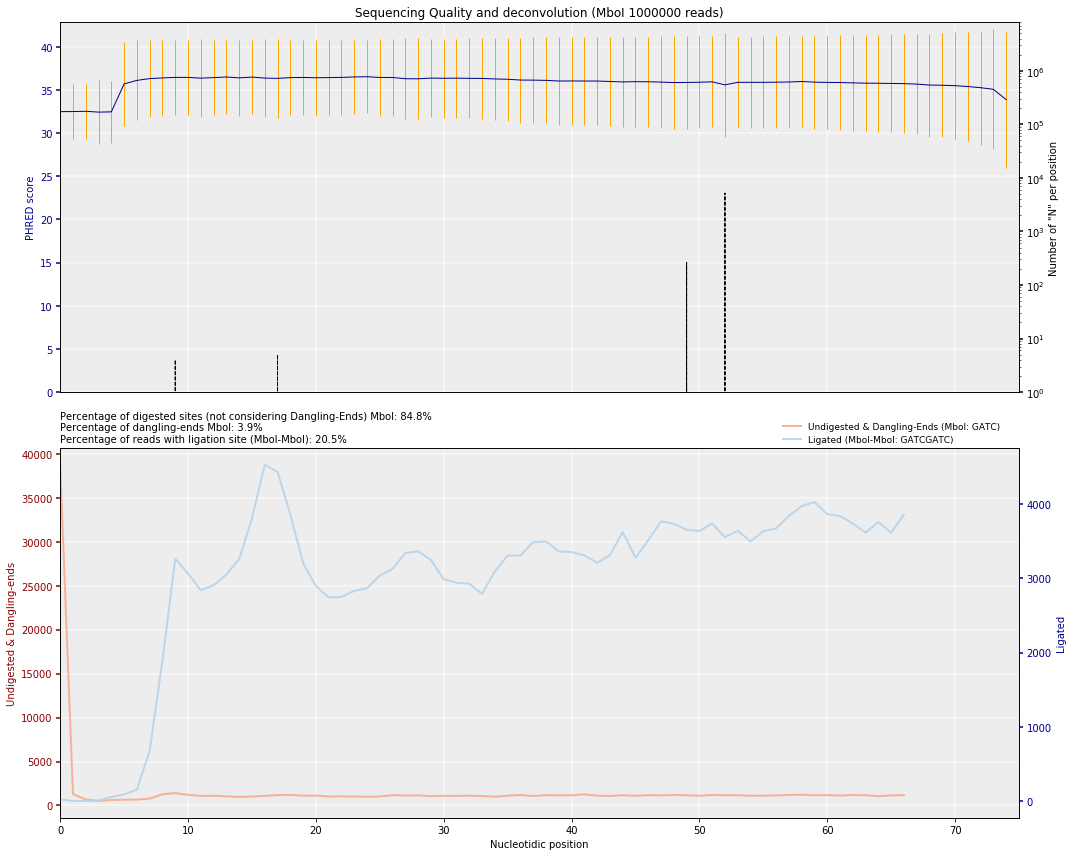

({'MboI': 3.8757}, {('MboI', 'MboI'): 20.5069})

In [8]:
quality_plot('FASTQs/mouse_{0}_{1}_1.fastq.dsrc'.format(cell, repl), r_enz=r_enz, nreads=1000000)

_Note: this plot is __compatible with the use of multiple restriction enzymes__ (which is why the ligation site is labeled as MboI-MboI)_